In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

# Ours
import tracking_SAM.aott

In [2]:
vos_weight_path = './pretrained_weights/AOTT_PRE_YTB_DAV.pth'

my_vos_tracker = tracking_SAM.aott.aot_segmenter(vos_weight_path)

In [3]:
# Call this to clear VOS internal states
my_vos_tracker.reset_engine()

In [4]:
test_data_base_dir = './sample_data/DAVIS_bear'

# Load images
image_paths_list = sorted([os.path.join(test_data_base_dir, 'images', x) for x in os.listdir(os.path.join(test_data_base_dir, 'images'))])

image_np_list = [np.array(Image.open(x)) for x in image_paths_list]

# Load the initial provided mask
init_mask_path = os.path.join(test_data_base_dir, 'init_mask', '00000.png')
init_mask = np.array(Image.open(init_mask_path)).astype(np.uint8)

init_mask[init_mask > 0] = 1

all_mask_list = [init_mask]  # The first mask is the initial mask

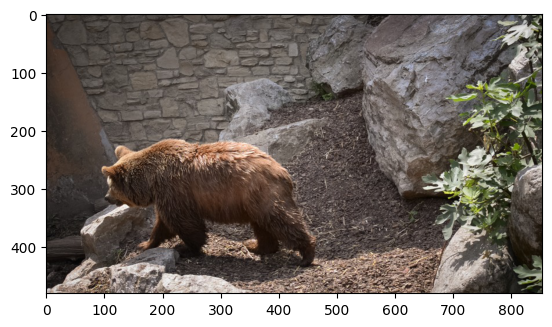

In [5]:
plt.imshow(image_np_list[0])

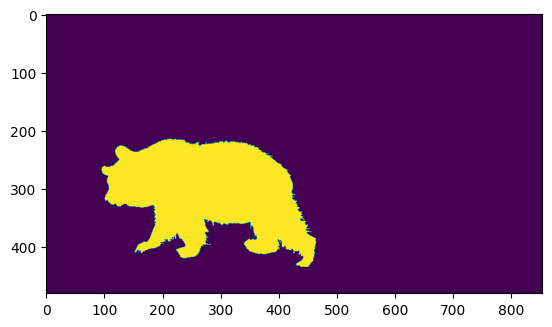

In [6]:
plt.imshow(init_mask)

In [7]:
my_vos_tracker.add_reference_frame(image_np_list[0], init_mask)

/home/roger/anaconda3/envs/aot/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
for i in trange(1, len(image_np_list)):
    cur_frame_np = image_np_list[i]
    cur_mask_np = my_vos_tracker.propagate_one_frame(cur_frame_np)
    all_mask_list.append(cur_mask_np)

100%|██████████| 81/81 [00:01<00:00, 47.31it/s]


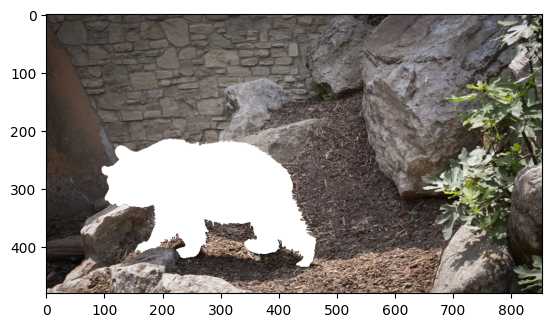

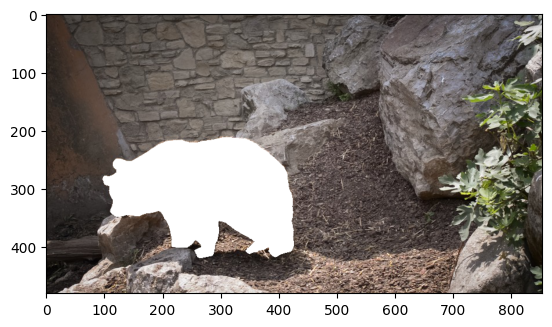

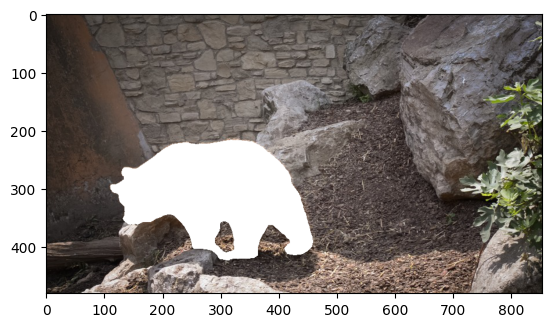

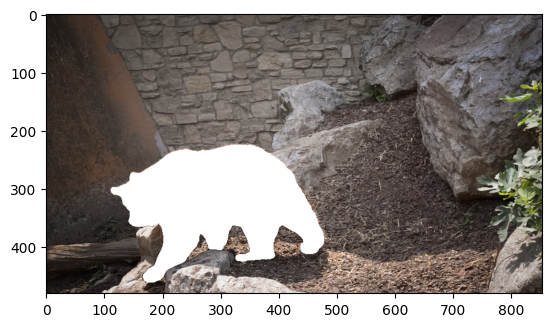

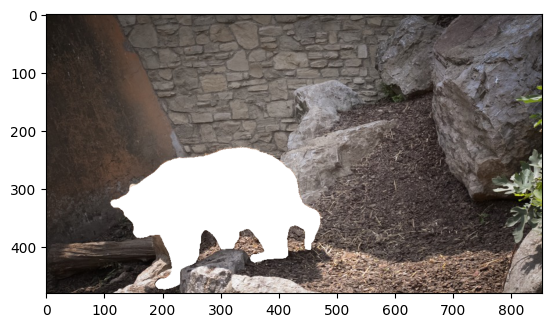

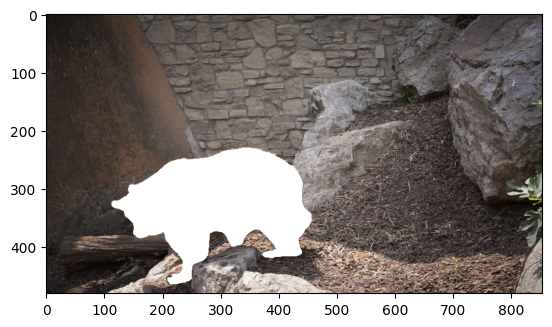

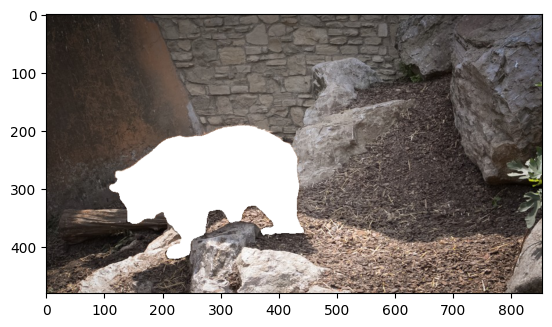

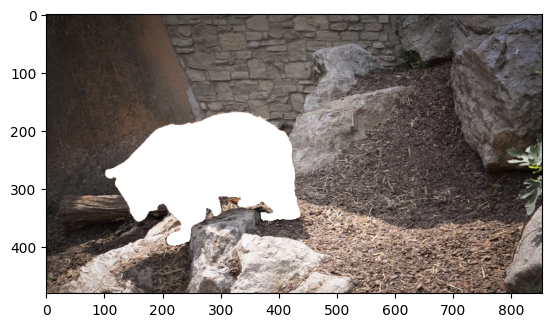

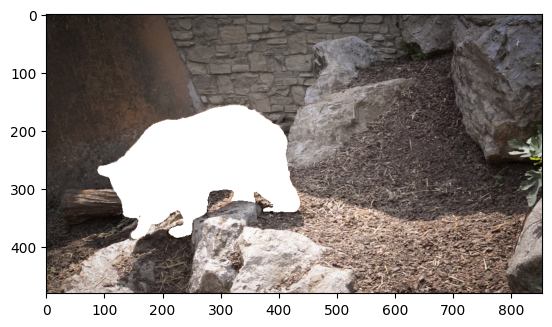

In [9]:
for i in range(0, len(all_mask_list), 10):
    viz_img = image_np_list[i].copy()
    viz_img[all_mask_list[i] > 0] = 255
    plt.imshow(viz_img)
    plt.show()